<h1 style='text-align:center; font-weight:1000'>
    Estadística Inferencial
</h1>

## **Librerias**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.options.display.max_columns = False

In [3]:
from scipy import stats

## **1. Funciones de muestreo**

In [4]:
df = pd.read_csv('Data/econdata.csv')

In [5]:
df.head(1)

,id,geo_point_2d,geo_shape,clave_cat,delegacion,perimetro,tipo,nom_id
0,0,"19.424781053,-99.1327537959","{""type"": ""Polygon"", ""coordinates"": [[[-99.1332...",307_130_11,Cuauhtémoc,B,Mercado,Pino Suárez


### **1.1 Muestreo aleatorio simple**

In [6]:
df.sample(8)

,id,geo_point_2d,geo_shape,clave_cat,delegacion,perimetro,tipo,nom_id
163,163,"19.4265454033,-99.1224859032","{""type"": ""Polygon"", ""coordinates"": [[[-99.1231...",323_063_05,Venustiano Carranza,B,Mercado,NaN
157,157,"19.4272935771,-99.1227492994","{""type"": ""Polygon"", ""coordinates"": [[[-99.1230...",323_063_08,Venustiano Carranza,B,Mercado,Merced Comidas
143,143,"19.4327710138,-99.142002608","{""type"": ""MultiPoint"", ""coordinates"": [[-99.14...",002_027_10,Cuautémoc,B,Hotel,Toledo
215,215,"19.4383767258,-99.1331865203","{""type"": ""MultiPoint"", ""coordinates"": [[-99.13...",004_082_16,Cuautémoc,A,Hotel,"La Fontelina , S.A. DE C.V."
89,89,"19.4373498816,-99.1421604061","{""type"": ""MultiPoint"", ""coordinates"": [[-99.14...",003_096_04,Cuautémoc,A,Hotel,Hidalgo
216,216,"19.4247697438,-99.1249707246","{""type"": ""Polygon"", ""coordinates"": [[[-99.1250...",323_118_37,Venustiano Carranza,B,Mercado,Lamininas de La Merced
173,173,"19.4314834886,-99.1259717478","{""type"": ""MultiPoint"", ""coordinates"": [[-99.12...",006_026_38,Cuautémoc,A,Hotel,Soledad
115,115,"19.4336966991,-99.1237253904","{""type"": ""MultiPoint"", ""coordinates"": [[-99.12...",323_010_09,Venustiano Carranza,B,Hotel,Antas


### **1.2 Muestreo sistemático**

In [7]:
posicion_inicial = 0
posicion_final = len(df)
steps = 3

df.iloc[list(range(posicion_inicial,posicion_final,steps)),:]

,id,geo_point_2d,geo_shape,clave_cat,delegacion,perimetro,tipo,nom_id
0,0,"19.424781053,-99.1327537959","{""type"": ""Polygon"", ""coordinates"": [[[-99.1332...",307_130_11,Cuauhtémoc,B,Mercado,Pino Suárez
3,3,"19.42489472,-99.12073393","{""type"": ""MultiPoint"", ""coordinates"": [[-99.12...",323_102_06,Venustiano Carranza,B,Hotel,Balbuena
6,6,"19.43553422,-99.12324801","{""type"": ""MultiPoint"", ""coordinates"": [[-99.12...",318_116_11,Venustiano Carranza,B,Hotel,San Antonio Tomatlan
9,9,"19.4407152937,-99.1498060057","{""type"": ""MultiPoint"", ""coordinates"": [[-99.14...",012_146_22,Cuautémoc,B,Hotel,Detroit
12,12,"19.43990186,-99.14813347","{""type"": ""MultiPoint"", ""coordinates"": [[-99.14...",003_079_16,Cuautémoc,B,Hotel,La Paz
...,...,...,...,...,...,...,...,...
216,216,"19.4247697438,-99.1249707246","{""type"": ""Polygon"", ""coordinates"": [[[-99.1250...",323_118_37,Venustiano Carranza,B,Mercado,Lamininas de La Merced
219,219,"19.4234096295,-99.1438351156","{""type"": ""MultiPoint"", ""coordinates"": [[-99.14...",002_118_03,Cuautémoc,B,Hotel,Prado Floresta
222,222,"19.4397905042,-99.134628735","{""type"": ""MultiPoint"", ""coordinates"": [[-99.13...",004_063_10,Cuautémoc,A,Hotel,Ladero
225,225,"19.43094655,-99.12455418","{""type"": ""MultiPoint"", ""coordinates"": [[-99.12...",323_027_04,Venustiano Carranza,B,Hotel,Gran Veracruz


### **1.3 Muestreo estratificado**

In [8]:
df['category'] = df['delegacion'] + '_' + df['tipo']

In [9]:
pd.DataFrame(round(df['category'].value_counts()/len(df) * 100, 2))

,category
Cuautémoc_Hotel,64.35
Cuautémoc_Museo,15.65
Venustiano Carranza_Hotel,7.83
Cuauhtémoc_Mercado,7.39
Venustiano Carranza_Mercado,4.78


In [10]:
df_est = pd.DataFrame(columns = df.columns)
muestra = 0.25

for i in set(df['category']):
    df_muestra = df.query(f'category == "{i}"').sample(int(muestra * len(df.query(f'category == "{i}"')))).copy()
    df_est = pd.concat([df_est, df_muestra], axis=0)

In [11]:
pd.DataFrame(round(df_est['category'].value_counts()/len(df_est) * 100, 2))

,category
Cuautémoc_Hotel,66.07
Cuautémoc_Museo,16.07
Venustiano Carranza_Hotel,7.14
Cuauhtémoc_Mercado,7.14
Venustiano Carranza_Mercado,3.57


## **2. Estadísticos y cálculos**

In [12]:
iris = sns.load_dataset('iris')

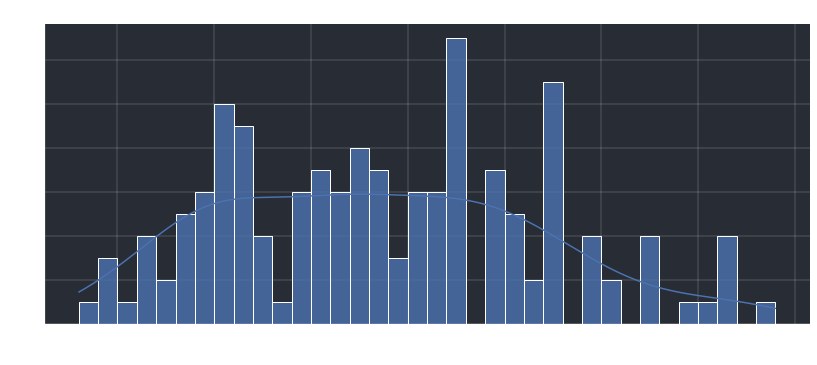

In [13]:
sns.set(rc={'figure.facecolor': '#21252b', 'axes.facecolor': '#282c34'})

sns.displot(data=iris, x='sepal_length', kde=True, alpha=0.8, bins=36, aspect=11.5/5)

plt.title('Histograma de frecuencia del largo del sépalo', fontweight=1000, color='w', fontsize=14)

plt.xlabel('Largo del sépalo', color='w', fontweight=1000)
plt.xticks(color='white', size=12)

plt.ylabel('Conteo', color='w', fontweight=1000)
plt.yticks(color='white', size=12)

plt.grid(linewidth=0.2)

plt.show()

#### **Promedio**

In [14]:
round(iris['sepal_length'].mean(), 2)

5.84

#### **Varianza**

In [15]:
round(iris['sepal_length'].var(), 2)

0.69

#### **Desviación estándar**

In [16]:
round(iris['sepal_length'].std(), 2)

0.83

### **Aplicando muestreo aleatorio simple**

In [17]:
iris_sample = iris.sample(frac=0.5)

#### **Promedio muestral**

In [18]:
iris_sample['sepal_length'].mean()

5.704000000000001

#### **Varianza muestral**

In [19]:
round(iris_sample['sepal_length'].var(), 2)

0.61

#### **Desviación estándar muestral**

In [20]:
round(iris_sample['sepal_length'].std(), 2)

0.78

## **3. Intervalos de Confianza**

### **Conociendo el nivel de significancia**

El valor de alpha es del 5%. El intervalo de confienza es del 95%

In [21]:
# Valor Z
round(stats.norm.ppf(0.975), 2)

1.96

El intervalo de confianza sería: [-1.96, 1.96]

### **Conociendo la media y la desviación estándar**

**Media** = 28 

**Desviación estándar** = 4 

**alpha** = 20% El intervalo de confienza es del 80%

In [22]:
# Valor Z
z_value = round(stats.norm.ppf(0.9), 2)

El intervalo de confianza con valores z sería: [-1.28, 1.28]

Conociendo la media y la desviación estándar podemos calcular los valores.

$$Z = \frac{x - \mu}{\sigma}$$

Entonces.

$$x = ({Z * \sigma}) + {\mu}$$

In [23]:
lim_inf = (-z_value * 4) + 28
lim_sup = (z_value * 4) + 28

In [24]:
[lim_inf, lim_sup]

[22.88, 33.12]

In [25]:
def intervalos_confianza(alpha, mean, std):
    confianza = 1 - (alpha/2)    
    z_value = round(stats.norm.ppf(confianza), 2)
    
    lim_inf = (-z_value * 4) + 28
    lim_sup = (z_value * 4) + 28
    
    return [lim_inf, lim_sup]

### **Aplicando a una simulación**

In [26]:
var_1 = np.random.randint(0, 10, 10)
var_2 = var_1 + np.random.normal(0, 1, 10)

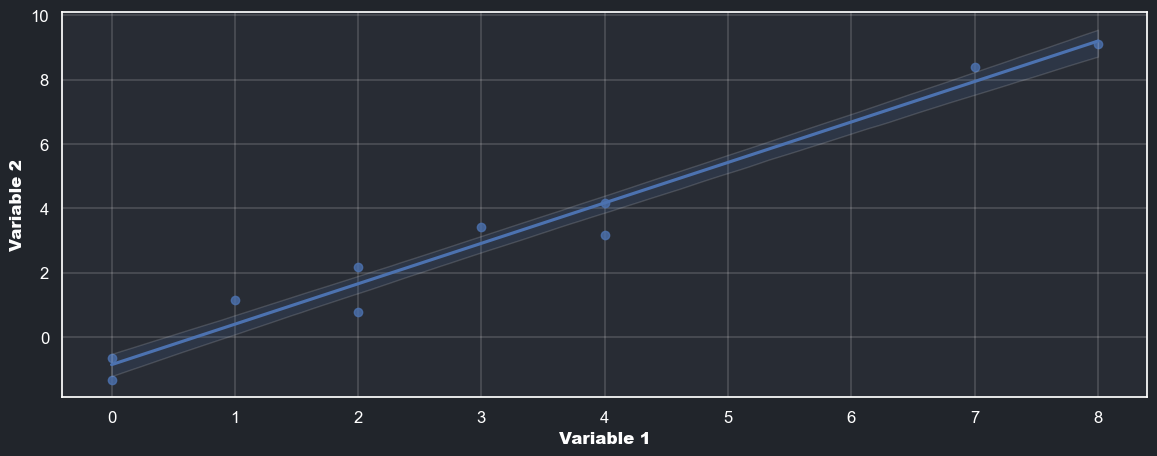

In [33]:
fig, ax = plt.subplots(figsize=(14, 5))

sns.regplot(x=var_1, y=var_2, ci=80)

plt.xlabel('Variable 1', color='w', fontweight=1000)
plt.xticks(color='white', size=12)

plt.ylabel('Variable 2', color='w', fontweight=1000)
plt.yticks(color='white', size=12)

plt.grid(linewidth=0.2)

plt.show()

In [28]:
datos = pd.DataFrame(list(zip(var_1, var_2)), columns=['Variable_1', 'Variable_2'])

In [31]:
# Para muestras menores a 30. En este caso utilizamos la distribución t
stats.t.interval(alpha=0.95, df=len(datos)-1, loc=np.mean(datos), scale=stats.sem(datos))

(array([1.14964091, 0.55381917]), array([5.05035909, 5.53263066]))

In [30]:
# Para muestras mayores a 29. En este caso utilizamos la distribución normal
stats.norm.interval(alpha=0.95, loc=np.mean(datos), scale=stats.sem(datos))

(array([1.41018214, 0.88636965]), array([4.78981786, 5.20008019]))

## **4. Pruebas de hipótesis**

<ol>
    <li>Establecer una hipótesis nula (Ho) y una hipótesis alternativa (H1).</li>
    <li>Seleccionar el nivel de significancia.</li>
    <li>Seleccionar el estadístico de prueba.</li>
    <li>Formular la regla de decisión.</li>
    <li>Interpretar los resultados y tomar una decisión.</li>
<ol>

### **Tipos de pruebas de hipótesis**

#### **Distribución T-Student**

Se usa para estimar una **media de población** normalmente distribuida a partir de una muestra pequeña que sigue una distribución normal y de la que desconocemos la desviación estándar.

$$t = \frac{x_1 - x_2}{\sqrt{\frac{(s_1)^{2}}{n_1} + \frac{(s_2)^{2}}{n_2}}}$$

In [43]:
se_length = iris['sepal_length'].std() / np.sqrt(10) 
se_width = iris['sepal_width'].std() / np.sqrt(10)

In [44]:
sed = np.sqrt((se_length**2) + (se_width**2))

In [48]:
t_stat = (iris['sepal_length'].mean() - iris['sepal_width'].mean()) / sed

In [49]:
t_stat

9.414779428410263

In [51]:
p = stats.ttest_ind(iris['sepal_length'], iris['sepal_width'])

In [55]:
p.pvalue

7.027919392009369e-112

In [60]:
stats.t.ppf(0.025, 19)

-2.0930240544082634

#### **Coefiente de Pearson**

Se usa para medir la dependecia lineal (correlación) entre dos variables cuantitativas.

#### **Análisis de Varianza - ANOVA**

Se usa para comparar las varianzas entre las medias de diferentes grupos.

### **Tipos de errores**

**Decisiones correctas**

- Rechazar Ho cuando es falsa.
- No rechazar Ho cuando es verdadera.

**Decisiones incorrectas**

- Rechazar Ho cuando es verdadera.
- No rechazar Ho cuando es falsa.

<table style='text-align:center'>
  <tr>
    <th></th>
    <th><strong>Ho Verdadera</strong></th>
    <th><strong>Ho Falsa</strong></th>
  </tr>
  <tr>
    <td><strong>Rechazamos Ho</strong></td>
    <td>
        Error tipo I <br/>
        P(Error tipo I) = α
    </td>
    <td>Decisión correcta</td>
  </tr>
  <tr>
    <td><strong>No rechazamos Ho</strong></td>
    <td>Decisión correcta</td>
    <td>
        Error tipo II <br/>
        P(Error tipo II) = β
    </td>
  </tr>
</table>